<a href="https://colab.research.google.com/github/raulbenitez/DAPR/blob/master/clustering_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load dataset

In [19]:
import seaborn as sns

df = sns.load_dataset('penguins') # load data
df1 = df.dropna() # remove nans
df1.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

#2. Remove non-numerical columns and NaNs

In [20]:
df2 = df1.drop(columns=['species', 'island','sex']) # remove non-numerical variables
df2.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


#3. Visualize numerical data

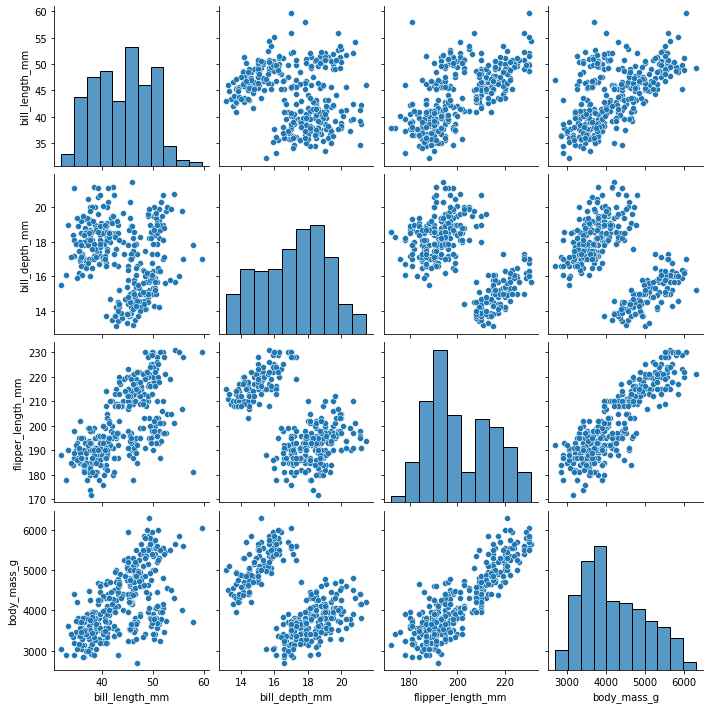

In [21]:
sns.pairplot(df2)

# 4. Apply k-means clustering

In [22]:
from sklearn.cluster import KMeans

group = KMeans(n_clusters=2).fit_predict(df2)
print(group)

[0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


#5. Represent clustering

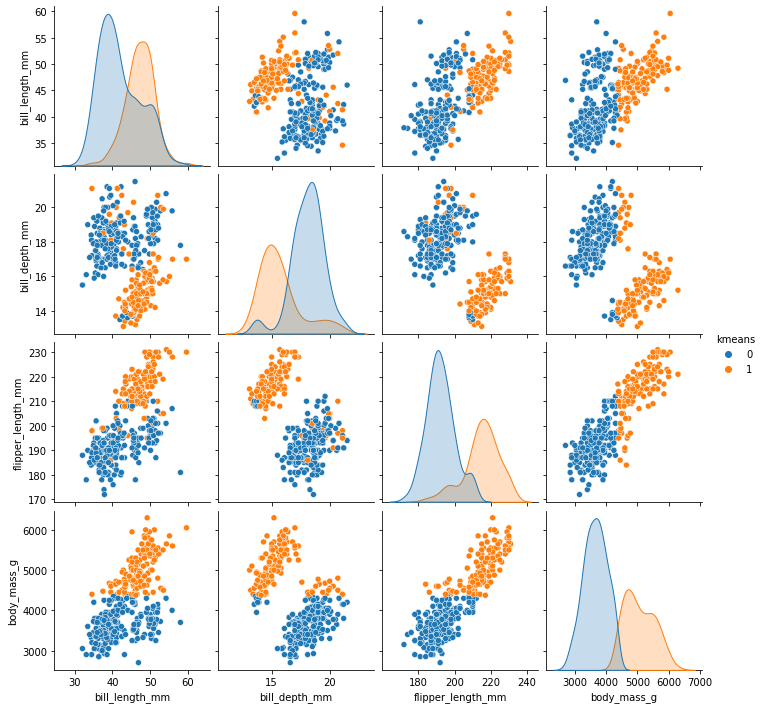

In [7]:
df2['kmeans'] = group

sns.pairplot(df2,hue='kmeans')

# 6. Interpret the clusters in terms of sex, island or species

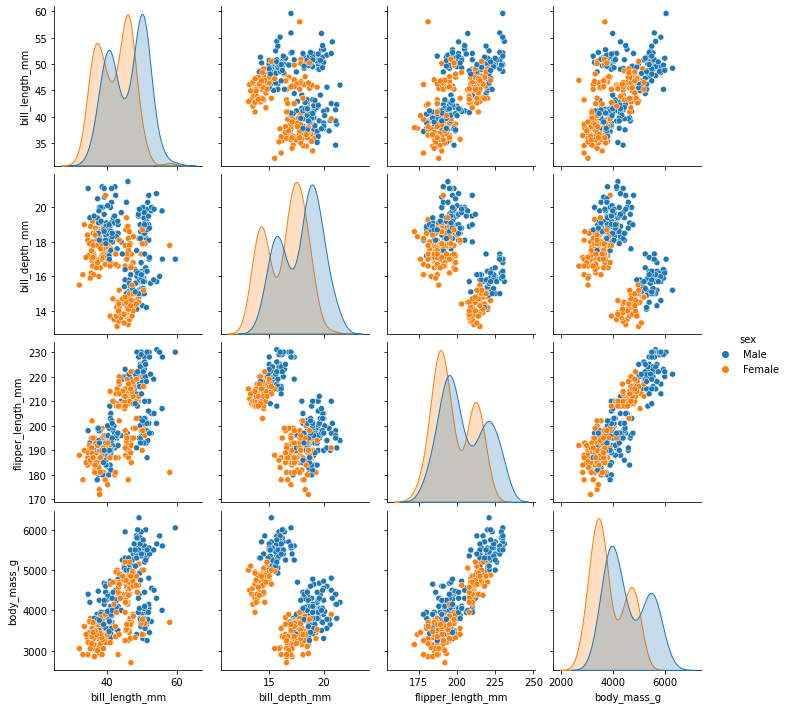

In [9]:
sns.pairplot(df,hue='sex')

k-means with k=2 does not identify sex groups

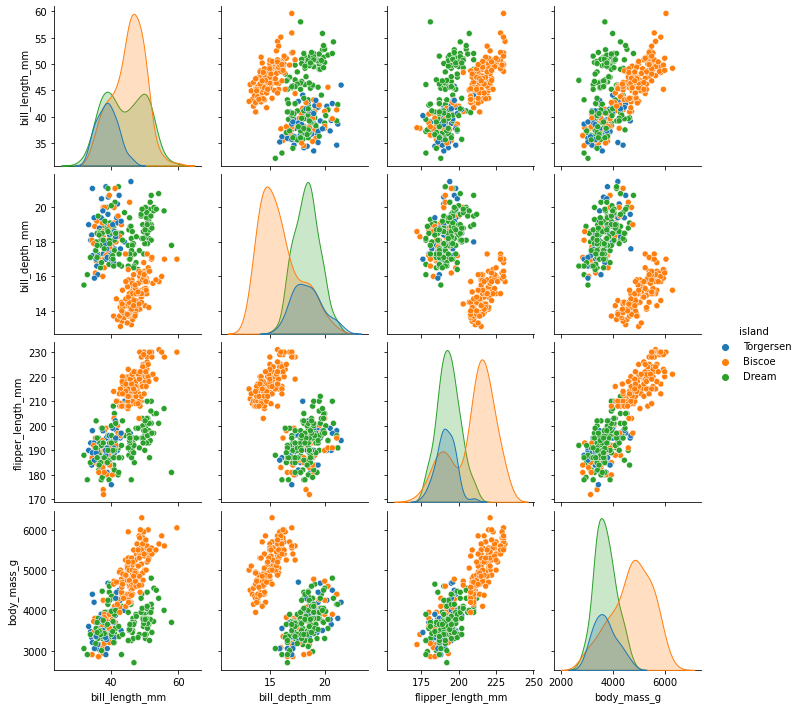

In [10]:
sns.pairplot(df,hue='island')

K-means with k=2 identifies penguins from Biscou island in one of the clusters and all the others in the second cluster

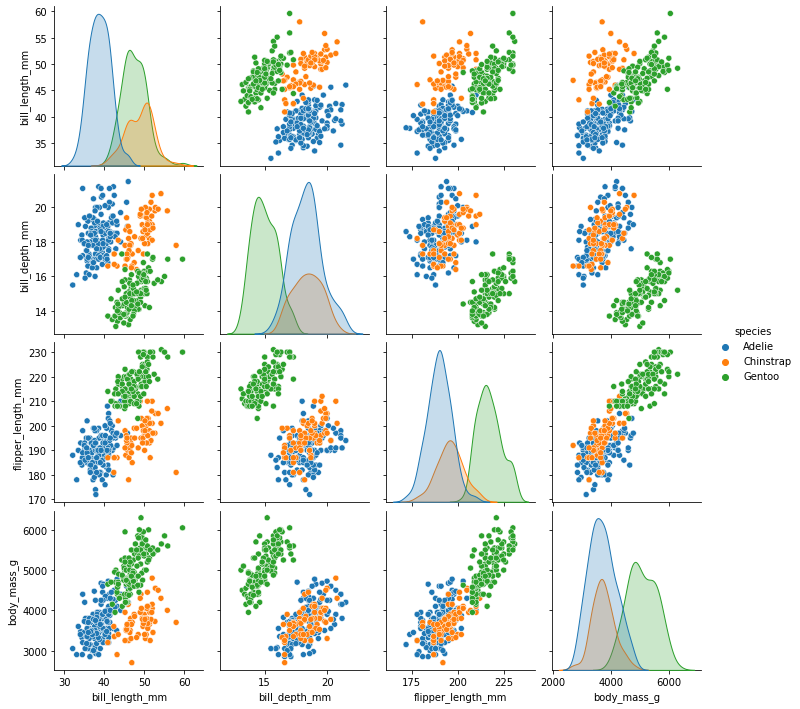

In [11]:
sns.pairplot(df,hue='species')

# 7. Try kmeans with more clusters

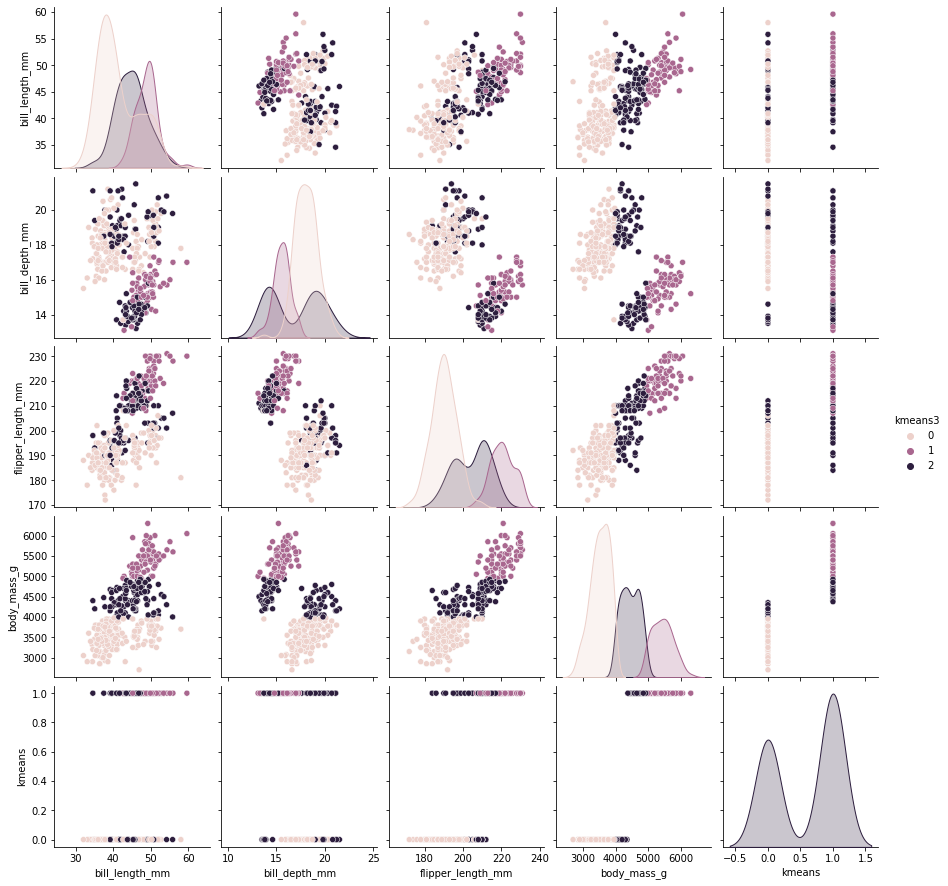

In [15]:
df2.drop(columns=['kmeans'])
group3 = KMeans(n_clusters=3).fit_predict(df2)
df2['kmeans3'] = group3

sns.pairplot(df2,hue='kmeans3')

# 8. Get kmeans centroid and dispersion of clusters

In [23]:
kmeans_model = KMeans(n_clusters=3).fit(df2)

In [24]:
kmeans_model.labels_

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [25]:
kmeans_model.cluster_centers_

array([[  44.66846847,   17.10810811,  203.63963964, 4387.83783784],
       [  48.91805556,   15.50972222,  220.45833333, 5421.18055556],
       [  41.12866667,   18.00133333,  189.63333333, 3490.5       ]])